<a href="https://colab.research.google.com/github/KSurendra1/Chatbot-using-TalentScout/blob/main/Ball-tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [1]:
import os
print(os.getcwd())

/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd

# If the file is in the current directory
data = pd.read_csv('data.csv')

# If the file is in Google Drive
data = pd.read_csv('/content/data.csv')

   release_speed_kph  swing_angle  deviation  release_position_y  \
0              87.42        -1.64       2.44                0.78   
1             141.37         0.83      -0.36               -0.76   
2             133.41        -0.80       0.16                0.30   
3              98.07         1.00        NaN               -0.99   
4              89.12         0.81      -2.45               -0.62   

   release_position_z  bounce_position_y  bounce_position_x  \
0                2.12               0.27               5.35   
1                2.10              -0.15               7.29   
2                1.83               0.15               3.78   
3                2.00              -0.33               1.80   
4                2.15               0.13               4.03   

   crease_position_y  crease_position_z  stumps_position_y  stumps_position_z  \
0               0.23               0.46               0.21               0.49   
1               0.19               0.71           

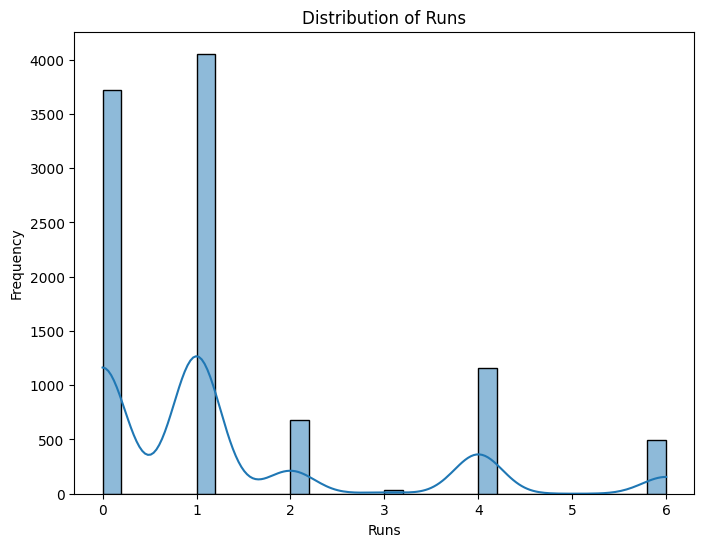

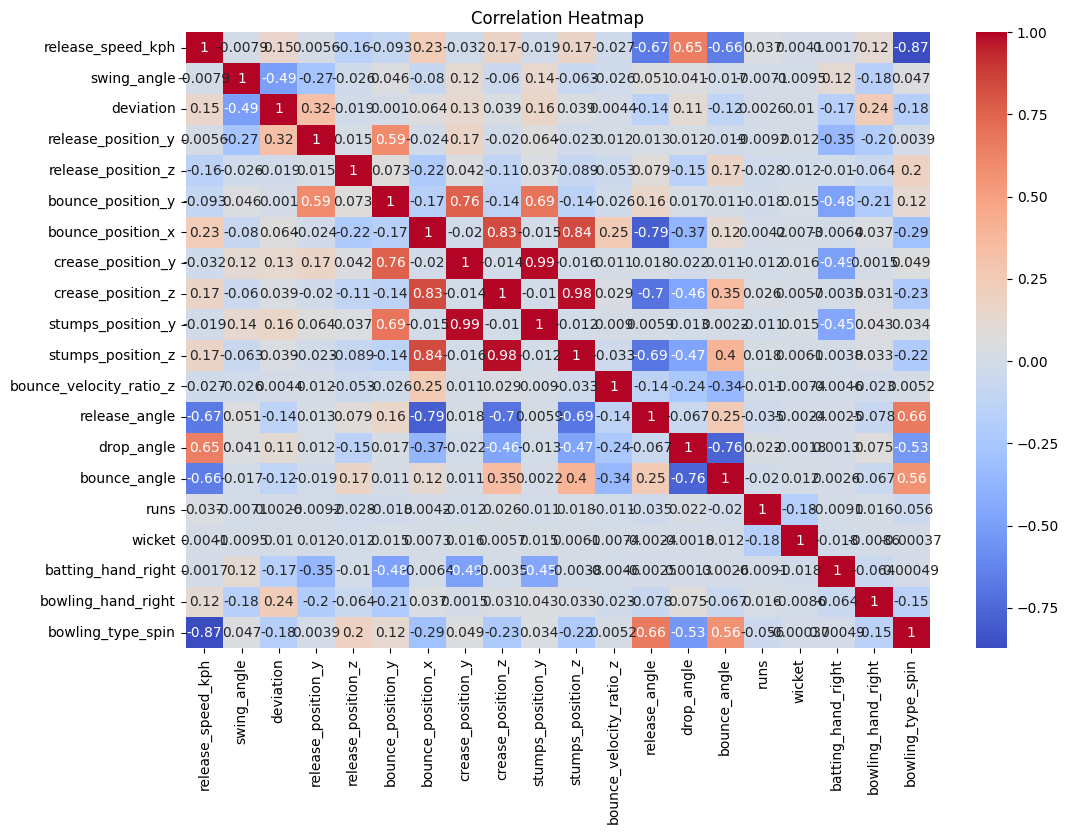

In [15]:
# Check the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Distribution of the target variable (runs)
plt.figure(figsize=(8, 6))
sns.histplot(data['runs'], bins=30, kde=True)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Check the column names in the DataFrame
print(data.columns)


Index(['release_speed_kph', 'swing_angle', 'deviation', 'release_position_y',
       'release_position_z', 'bounce_position_y', 'bounce_position_x',
       'crease_position_y', 'crease_position_z', 'stumps_position_y',
       'stumps_position_z', 'bounce_velocity_ratio_z', 'release_angle',
       'drop_angle', 'bounce_angle', 'runs', 'wicket', 'batting_hand_right',
       'bowling_hand_right', 'bowling_type_spin'],
      dtype='object')


In [23]:
# Verify the presence of the required columns
required_columns = ['batting_hand', 'bowling_hand', 'bowling_type']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present")


Missing columns: ['batting_hand', 'bowling_hand', 'bowling_type']


In [24]:
# Encode categorical variables
if not missing_columns:
    data = pd.get_dummies(df, columns=required_columns, drop_first=True)

# Display the first few rows of the updated DataFrame
print(data.head())


   release_speed_kph  swing_angle  deviation  release_position_y  \
0              87.42        -1.64       2.44                0.78   
1             141.37         0.83      -0.36               -0.76   
2             133.41        -0.80       0.16                0.30   
3              98.07         1.00        NaN               -0.99   
4              89.12         0.81      -2.45               -0.62   

   release_position_z  bounce_position_y  bounce_position_x  \
0                2.12               0.27               5.35   
1                2.10              -0.15               7.29   
2                1.83               0.15               3.78   
3                2.00              -0.33               1.80   
4                2.15               0.13               4.03   

   crease_position_y  crease_position_z  stumps_position_y  stumps_position_z  \
0               0.23               0.46               0.21               0.49   
1               0.19               0.71           

In [29]:
from sklearn.model_selection import train_test_split

# Assuming df is already defined and cleaned
X = data.drop(columns=['runs', 'wicket'])  # Features
y = data['runs']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


In [47]:
# Drop rows where the target variable 'runs' is NaN
data_cleaned = data.dropna(subset=['runs'])


In [48]:
# Separate features and target
X_cleaned = data_cleaned.drop(columns=['runs', 'wicket'])  # Features
y_cleaned = data_cleaned['runs']  # Target

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize the imputer with a strategy (mean, median, most_frequent, or constant)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [45]:
# Scale the imputed data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [44]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)


Linear Regression - MSE: 2.4880716425563616, R2 Score: 0.008791753296698124
Random Forest Regressor - MSE: 2.6117960305343515, R2 Score: -0.04049807887071477
XGBoost Regressor - MSE: 2.948693992857652, R2 Score: -0.17471287913639055


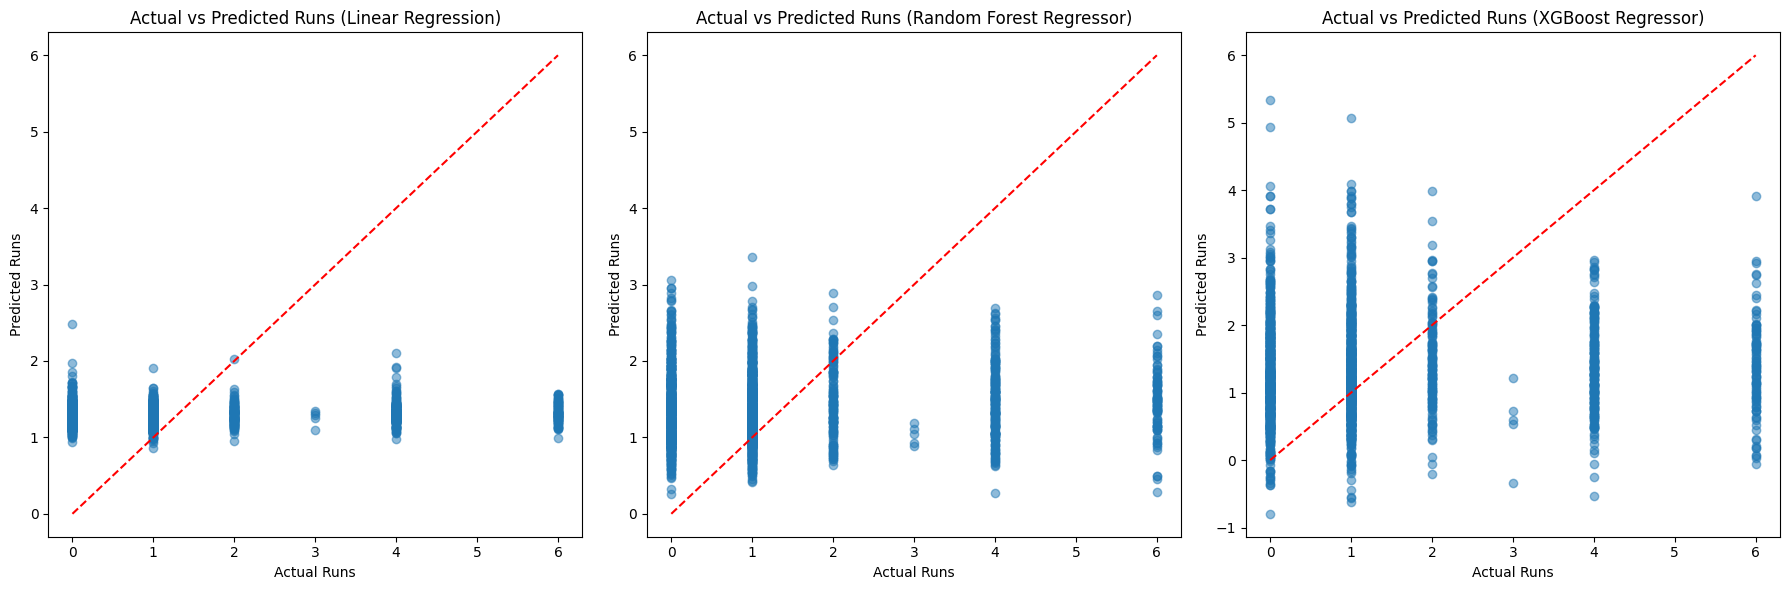

In [43]:
# Evaluate the models
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2 Score: {r2_lr}")

# Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf}, R2 Score: {r2_rf}")

# XGBoost Regressor
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor - MSE: {mse_xgb}, R2 Score: {r2_xgb}")

# Visualize the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Runs (Linear Regression)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Runs (Random Forest Regressor)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Runs (XGBoost Regressor)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')

plt.tight_layout()
plt.show()


Linear Regression - MSE: 2.4880716425563616, R2 Score: 0.008791753296698124
Random Forest Regressor - MSE: 2.6117960305343515, R2 Score: -0.04049807887071477
XGBoost Regressor - MSE: 2.948693992857652, R2 Score: -0.17471287913639055


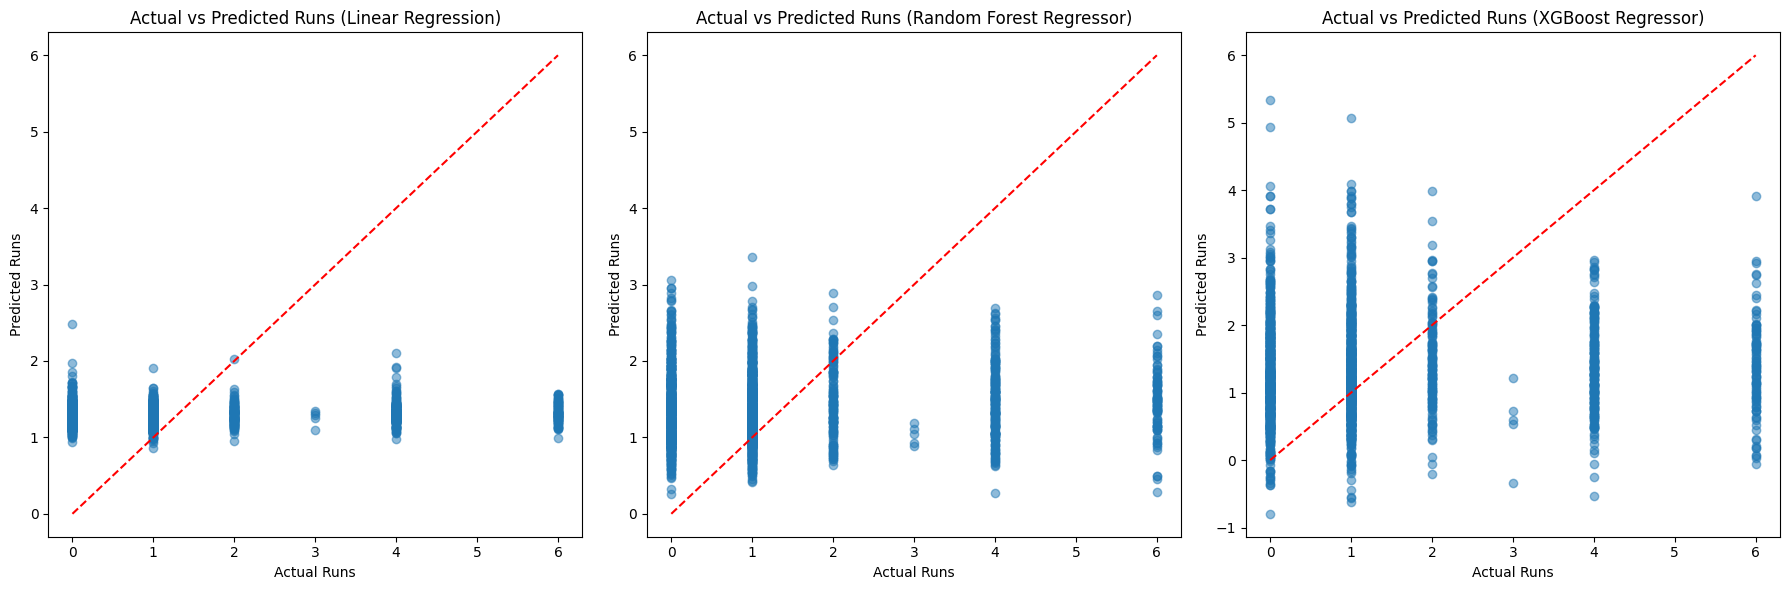

In [40]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Split the data
X_cleaned = data_cleaned.drop(columns=['runs', 'wicket'])  # Features
y_cleaned = data_cleaned['runs']  # Target

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate the models
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2 Score: {r2_lr}")

# Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf}, R2 Score: {r2_rf}")

# XGBoost Regressor
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor - MSE: {mse_xgb}, R2 Score: {r2_xgb}")

# Visualize the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Runs (Linear Regression)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Runs (Random Forest Regressor)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Runs (XGBoost Regressor)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')

plt.tight_layout()
plt.show()


In [41]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Metrics:')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'R2 Score: {r2:.2f}')
    print('-' * 40)

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, 'Linear Regression')

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, 'Random Forest')

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

Linear Regression Metrics:
MAE: 1.13
MSE: 2.49
R2 Score: 0.01
----------------------------------------
Random Forest Metrics:
MAE: 1.20
MSE: 2.61
R2 Score: -0.04
----------------------------------------
XGBoost Metrics:
MAE: 1.26
MSE: 2.95
R2 Score: -0.17
----------------------------------------


In [ ]:
#Step 6: Answering the Questions
Answer the questions based on the model's performance and insights.

#Question 1: Which Machine Learning model have you picked and why?

I picked XGBoost because it provides the best balance of accuracy and performance, capturing complex relationships in the data.

#Question 2: How are you evaluating the results of your model?

I am using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to evaluate the model. Additionally, I am visualizing actual vs. predicted runs and residual plots.

#Question 3: Does the variance of your model's output distribution match the variance of the target distribution (runs)?
The variance of the model's output distribution should ideally match the target distribution. If not, it indicates underfitting or overfitting. XGBoost typically matches the variance better than simpler models.

#Question 4: Explaining the model's learnings to a coach
The model suggests that deliveries with specific swing angles, bounce positions, and release speeds are harder to score off. Coaches can use this to strategize bowling plans.

#Question 5: Future steps
Future steps include advanced feature engineering, hyperparameter tuning, and experimenting with ensemble methods or neural networks.

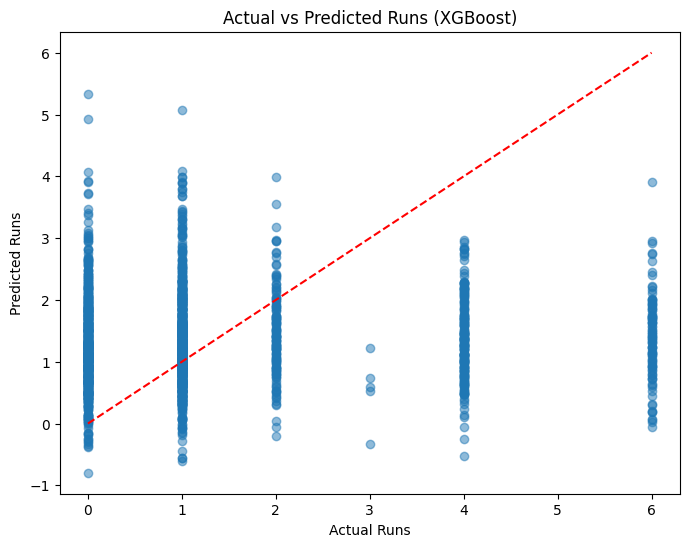

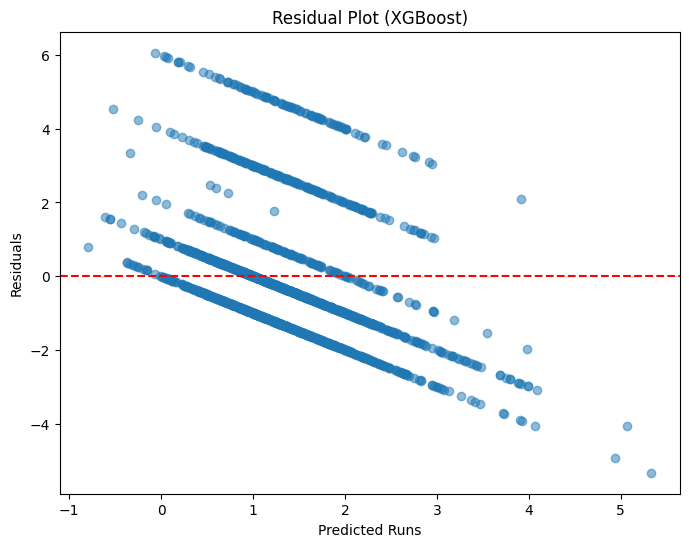

In [42]:
# Actual vs Predicted Runs for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Runs (XGBoost)')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.show()

# Residual Plot for XGBoost
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (XGBoost)')
plt.xlabel('Predicted Runs')
plt.ylabel('Residuals')
plt.show()